In [463]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from io import StringIO
import matplotlib.ticker as ticker
from typing import List
from matplotlib.axes import Axes
from matplotlib.figure import Figure



In [464]:
data = """
År(Slutt),Mats,Top10%,Top25%,Snitt,Median,Bunn25%
2022,630,664,620,609,600,580
2023,655,760,690,670,650,620
2024,630,881,800,753,732,689
"""
df = pd.read_csv(StringIO(data),sep=",")


In [465]:
def to_integer(value:float, tick_number)->int:
    return int(value)

def plot_by_year(ax: Axes, yaxis: List[int], xaxis: List[int], name: str, color: str):
    ax.scatter(yaxis, xaxis,color=color,label=name)
    ax.plot(yaxis,xaxis,linestyle="-",color=color)
    
def avg_growth(nok: List[float])->float:
    percentages = [ high/low for (low,high) in zip(nok[:-1],nok[1:])]
    return sum(percentages)/len(percentages)


def plot_2024(ax: Axes, yaxis: List[int], xaxis: List[int], name: str, color: str):
    ax.scatter(yaxis,xaxis,color=color,label=name)
    ax.plot(yaxis,xaxis,linestyle="-",color=color)
    
def custom_plot_formatter(ax: Axes,xmax: int, xmin: int)->Axes:
    ax.set_xlim(left=xmin,right=xmax)
    # ax.xaxis.set_visible(False)
    # ax.yaxis.set_visible(False)
    ax.set_xlabel("Tusen Nok")
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(to_integer))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=50))  # Set the x-ticks to be spaced evenly
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda value, tick_number: f'{int(value)}'))

    ax.set_ylim(bottom=2023,top=2025)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1))  # Set the y-ticks to be spaced evenly
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, tick_number: f'{int(value)}'))

    ax.grid(True)
    ax.set_title("(Mastergrad i data/IT, eksamensår 2022)")
    return ax


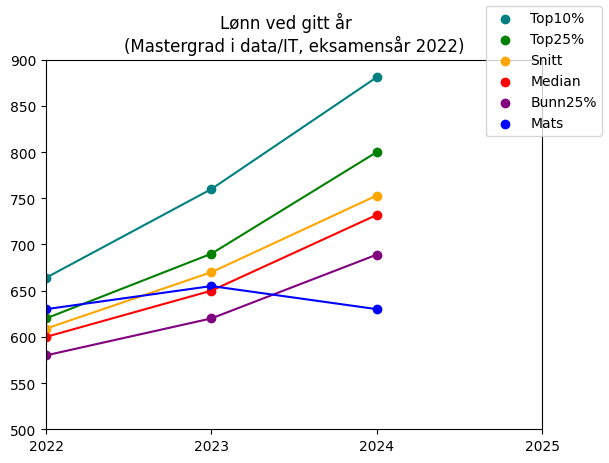

In [466]:
xmin_base = 2022
xmax_base = 2025
ymin_base = 500
ymax_base = 900
fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
for (field,color) in zip(fields,colors):
    xvals = df[field]
    yvals = df["År(Slutt)"]
    plot_by_year(ax,yaxis = yvals, xaxis=xvals,name=field,color=color)

xmin = xmin_base
xmax = xmax_base
ymin = ymin_base
ymax = ymax_base

ax.set_xlim(left=xmin,right=xmax)
ax.set_ylim(bottom=ymin,top=ymax)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(to_integer))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=xmax-xmin))
ax.set_title("(Mastergrad i data/IT, eksamensår 2022)")
fig.suptitle("Lønn ved gitt år")
fig.legend()
plt.show()


In [467]:
snitt = df["Snitt"][2]
delta = df["Top10%"][2]-snitt
xmin_base = snitt - (delta*2)
xmax_base = snitt + (delta*2)
ymin_base = 2023
ymax_base = 2025

xmin = xmin_base
xmax = xmax_base
ymin = ymin_base
ymax = ymax_base

fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%"]
colors = ["teal",  "green", "orange","red",   "purple"]

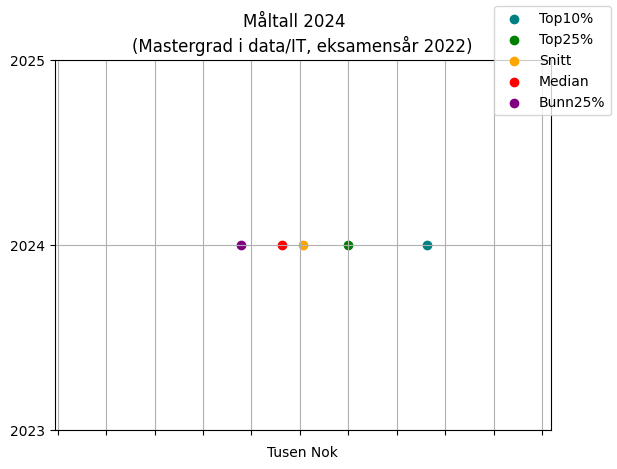

In [468]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base
ymax = ymax_base

fig,ax = plt.subplots()
for (field,color) in zip(fields,colors):
    yvals = df[field][2]
    plot_2024(ax,yaxis = yvals, xaxis=2024,name=field,color=color)

ax = custom_plot_formatter(ax,xmax,xmin)
ax.set_xticklabels([])

fig.suptitle("Måltall 2024")
fig.legend()
plt.show()

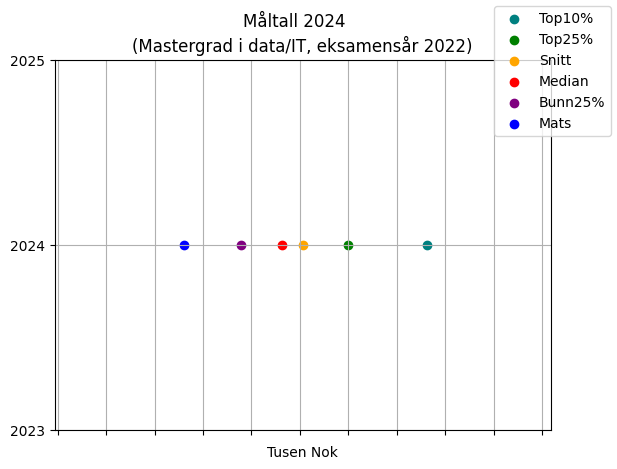

In [469]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base
ymax = ymax_base

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
for (field,color) in zip(fields,colors):
    yvals = df[field][2]
    plot_2024(ax,yaxis = yvals, xaxis=2024,name=field,color=color)
    
ax = custom_plot_formatter(ax,xmax,xmin)
ax.set_xticklabels([])
fig.suptitle("Måltall 2024")
fig.legend()
plt.show()

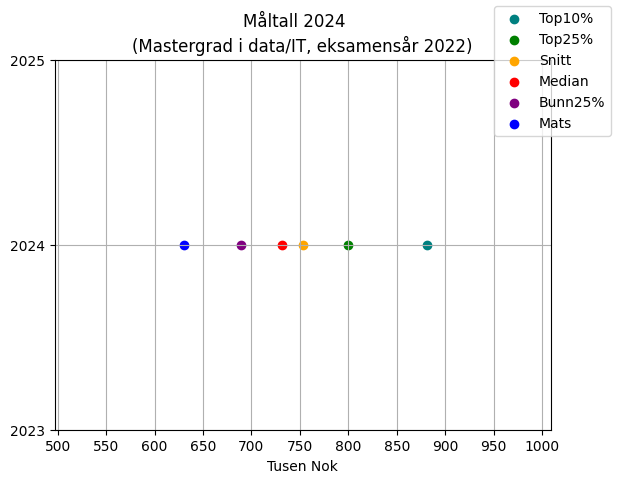

In [470]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base
ymax = ymax_base

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals = df[field][2]
    plot_2024(ax,yaxis = yvals, xaxis=2024,name=field,color=color)
    # ax.annotate(str(yvals), (yvals, 0), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')

ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
fig.suptitle("Måltall 2024")
fig.legend()
plt.show()


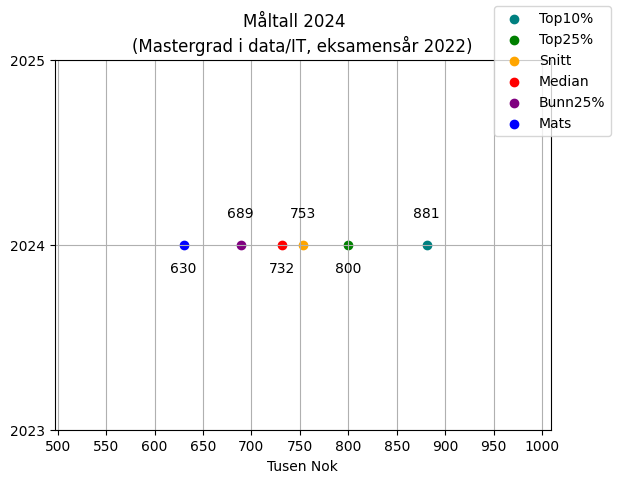

In [471]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base
ymax = ymax_base

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals = df[field][2]
    plot_2024(ax,yaxis = yvals, xaxis=2024,name=field,color=color)
    ax.annotate(str(yvals), (yvals, 2024), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')

ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
fig.suptitle("Måltall 2024")
fig.legend()


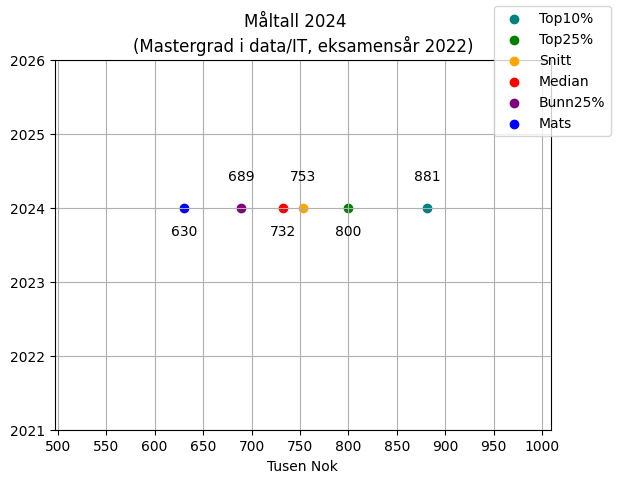

In [472]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base-2
ymax = ymax_base+1

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals = df[field][2]
    plot_2024(ax,yaxis = yvals, xaxis=2024,name=field,color=color)
    ax.annotate(str(yvals), (yvals, 2024), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')

ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
ax.set_ylim(bottom=ymin,top=ymax)
fig.suptitle("Måltall 2024")
fig.legend()


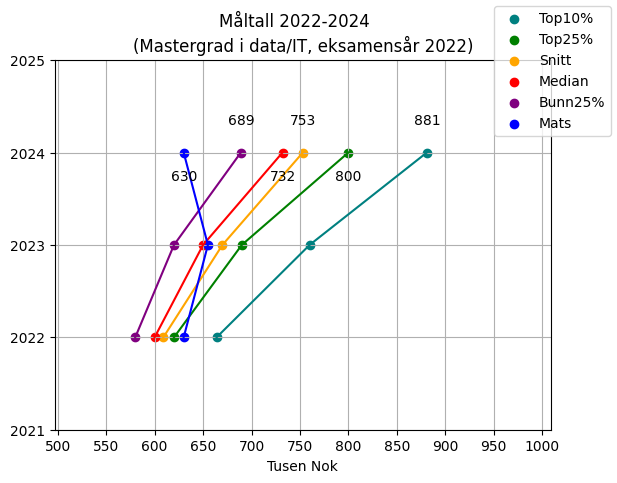

In [473]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base-2
ymax = ymax_base


fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals = [int(y) for y in df[field]]
    xvals = [int(x) for x in df["År(Slutt)"]]
    plot_2024(ax,yaxis = yvals, xaxis=xvals,name=field,color=color)
    ax.annotate(str(yvals[-1]), (yvals[-1], xvals[-1]), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')


ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
ax.set_ylim(bottom=ymin,top=ymax)
fig.suptitle("Måltall 2022-2024")
fig.legend()
plt.show()


Avg growth:
 - Top10%: 15%
 - Top25%: 14%
 - Snitt: 11%
 - Median: 10%
 - Bunn25%: 9%
 - Mats: 0%



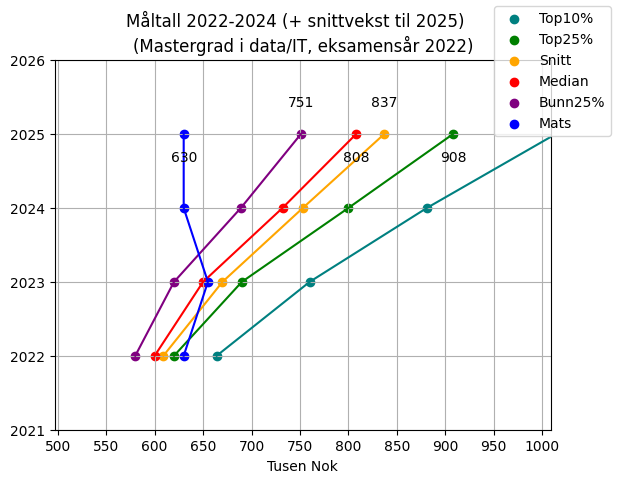

In [474]:
xmin = xmin_base
xmax = xmax_base
ymin = ymin_base-2
ymax = ymax_base+1

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
print("Avg growth:")
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals = [float(y) for y in df[field]]
    xvals = [int(x) for x in df["År(Slutt)"]] + [2025]
    average_increase = avg_growth(yvals)
    
    print(f" - {field}: {(average_increase-1)*100:.0f}%")
    yvals += [int(yvals[-1]*average_increase)]

    plot_2024(ax,yaxis = yvals, xaxis=xvals,name=field,color=color)
    ax.annotate(str(yvals[-1]), (yvals[-1], xvals[-1]), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')
print()

ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
ax.set_ylim(bottom=ymin,top=ymax)
fig.suptitle("Måltall 2022-2024 (+ snittvekst til 2025)")
fig.legend()
plt.show()


Avg growth:
 - Top10%: 11%
 - Top25%: 11%
 - Snitt: 9%
 - Median: 9%
 - Bunn25%: 9%
 - Mats: 1%
Top10%: [664.0, 760.0, 881.0] -> [718, 854, 881]
Top25%: [620.0, 690.0, 800.0] -> [652, 775, 800]
Snitt: [609.0, 670.0, 753.0] -> [633, 730, 753]
Median: [600.0, 650.0, 732.0] -> [614, 709, 732]
Bunn25%: [580.0, 620.0, 689.0] -> [586, 668, 689]
Mats: [630.0, 655.0, 630.0] -> [619, 611, 630]


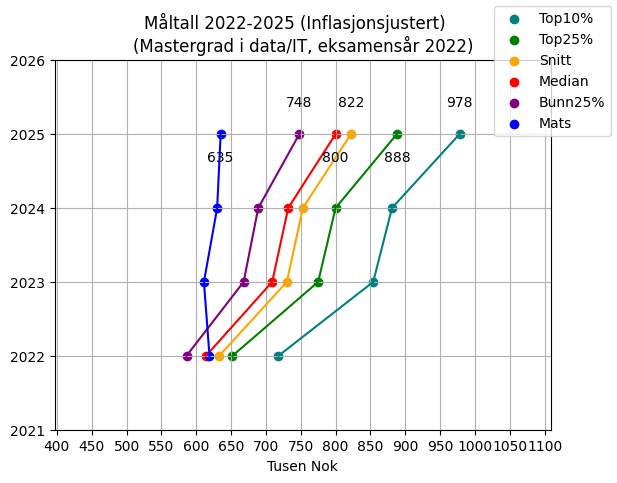

In [ ]:
def inflasjonsjustert(data: List[int])->List[int]:
    infla = [5.8,3.1]
    data_clone = data.copy()
    data_clone[-1] = data[-1]
    data_clone[-2] = data_clone[-1] / (1.0 + (infla[-1]/100))
    data_clone[-3] = data[-2] / (1.0 + (infla[-2]/100))
    return [int(v) for v in data_clone]


xmin = xmin_base-100
xmax = xmax_base+100
ymin = ymin_base-2
ymax = ymax_base+1

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
print("Avg growth:")
inflation_adjustment_changes = []
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals_base = [float(y) for y in df[field]]
    yvals = inflasjonsjustert(yvals_base)
    inflation_adjustment_changes.append(f"{field}:   \t{yvals_base} -> {yvals}")
    xvals = [int(x) for x in df["År(Slutt)"]] + [2025]
    average_increase = avg_growth(yvals)
    
    print(f" - {field}: {(average_increase-1)*100:.0f}%")
    yvals += [int(yvals[-1]*average_increase)]

    plot_2024(ax,yaxis = yvals, xaxis=xvals,name=field,color=color)
    ax.annotate(str(yvals[-1]), (yvals[-1], xvals[-1]), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')
for s in inflation_adjustment_changes:
    print(s)

ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
ax.set_ylim(bottom=ymin,top=ymax)
fig.suptitle("Måltall 2022-2025 (Inflasjonsjustert)")
fig.legend()
plt.show()


Avg growth:
 - Top10%: 15%
 - Top25%: 14%
 - Snitt: 11%
 - Median: 10%
 - Bunn25%: 9%
 - Mats: 10%
Top10%:   	[664.0, 760.0, 881.0] -> [664.0, 760.0, 881.0]
Top25%:   	[620.0, 690.0, 800.0] -> [620.0, 690.0, 800.0]
Snitt:   	[609.0, 670.0, 753.0] -> [609.0, 670.0, 753.0]
Median:   	[600.0, 650.0, 732.0] -> [600.0, 650.0, 732.0]
Bunn25%:   	[580.0, 620.0, 689.0] -> [580.0, 620.0, 689.0]
Mats:   	[630.0, 655.0, 630.0] -> [630.0, 655.0, 630.0]


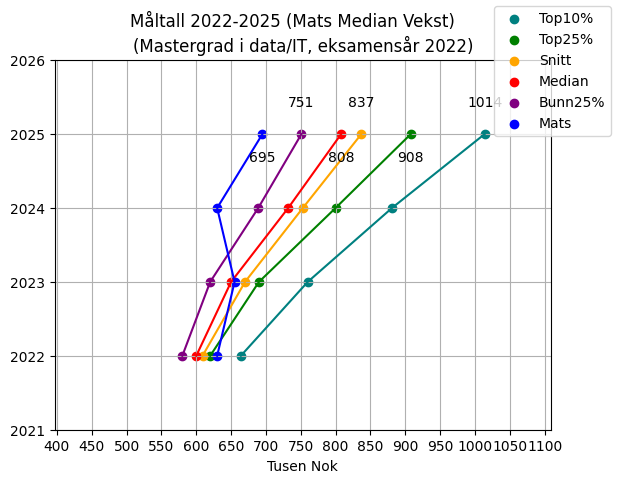

In [481]:
def inflasjonsjustert(data: List[int])->List[int]:
    infla = [5.8,3.1]
    data_clone = data.copy()
    data_clone[-1] = data[-1]
    data_clone[-2] = data_clone[-1] / (1.0 + (infla[-1]/100))
    data_clone[-3] = data[-2] / (1.0 + (infla[-2]/100))
    return [int(v) for v in data_clone]


xmin = xmin_base-100
xmax = xmax_base+100
ymin = ymin_base-2
ymax = ymax_base+1

fig,ax = plt.subplots()
fields = ["Top10%","Top25%","Snitt", "Median","Bunn25%","Mats"]
colors = ["teal",  "green", "orange","red",   "purple", "blue"]
inflation_adjustment_changes = []
print("Avg growth:")
for (idx,(field,color)) in enumerate(zip(fields,colors)):
    yvals_base = [float(y) for y in df[field]]
    # yvals = inflasjonsjustert(yvals_base)
    yvals = yvals_base
    inflation_adjustment_changes.append(f"{field}:   \t{yvals_base} -> {yvals}")
    xvals = [int(x) for x in df["År(Slutt)"]] + [2025]
    average_increase = avg_growth(yvals)
    if field == "Mats":
        median_vals = [float(y) for y in df["Median"]]
        average_increase = avg_growth(median_vals)
    
    print(f" - {field}: {(average_increase-1)*100:.0f}%")
    yvals += [int(yvals[-1]*average_increase)]

    plot_2024(ax,yaxis = yvals, xaxis=xvals,name=field,color=color)
    ax.annotate(str(yvals[-1]), (yvals[-1], xvals[-1]), textcoords="offset points", xytext=(0,20 * (1-(2*(idx%2)))), ha='center')

for s in inflation_adjustment_changes:
    print(s)

ax = custom_plot_formatter(ax,xmax,xmin)
ax.xaxis.set_visible(True)
ax.set_ylim(bottom=ymin,top=ymax)
fig.suptitle("Måltall 2022-2025 (Mats Median Vekst) ")
fig.legend()
plt.show()
